#**SVM with MNIST**

Code addapted from:

https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html

**Question:**

Describe how the multi-class classification is different for SVC and LinearSVC. Be explicit, don't just describe what's in the documentation. For example, what does 'one-against-one' and 'one-vs-the-rest' mean?

**Importing the packages and the dataset**

In [1]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [6]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0])

In [9]:
X_train.shape, y_train.shape

((52500, 784), (52500,))

In [25]:
X_test.shape, y_test.shape

((17500, 784), (17500,))

In [10]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

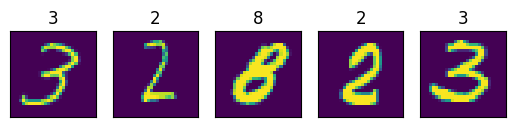

In [11]:
plot_example(X_train, y_train)

**Linear SVC**

Running a Sample Linear SVM classifier on default values to see how the model does on MNIST data

In [12]:
svm = LinearSVC(dual=False)

In [13]:
svm.fit(X_train, y_train)

LinearSVC(dual=False)

In [14]:
svm.coef_
svm.intercept_

array([-1.11196454, -0.16630634, -0.84287183, -1.22447961, -0.50720558,
        0.0274873 , -1.12822255, -0.25532382, -2.13919819, -1.32314682])

In [15]:
pred = svm.predict(X_test)

In [16]:
accuracy_score(y_test, pred)

0.9140571428571429

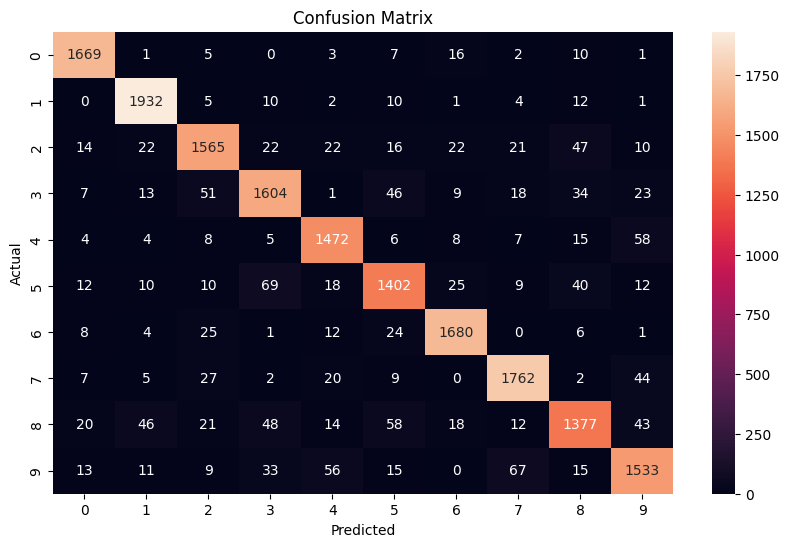

In [17]:
cm = confusion_matrix(y_test, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()



As we can see that the SVM does a pretty decent job at classifying, we still get the usual misclassification on 5-8, 2-8, 5-3, 4-9. However, accuracy of 91.82% is good

**Running Linear SVC for multiple cost factor(s) C**

In [18]:
acc = []
acc_tr = []
coefficient = []
for c in [0.001,0.01,0.1,1,10,100]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(X_train, y_train)
    coef = svm.coef_

    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)

    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)

    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

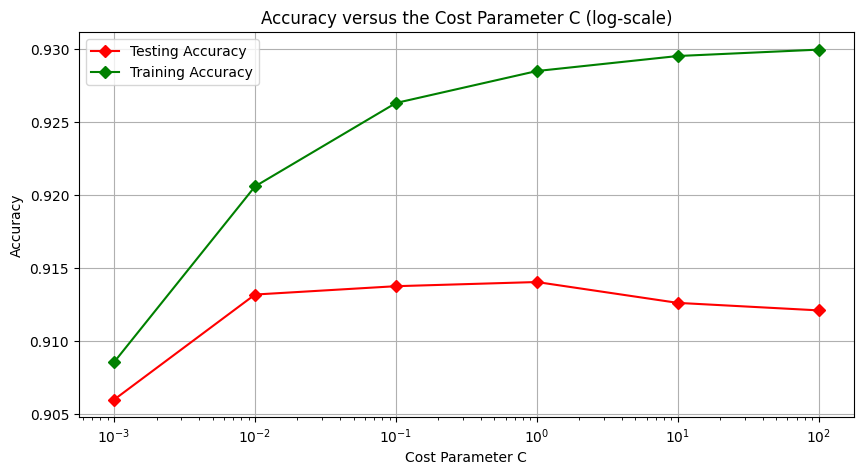

In [19]:
c = [0.001,0.01,0.1,1,10,100]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

We clearly see a bias variance trade off in the graph. As the cost increases, the Training accuracy increases, so as the test accuracy, but only till c=1, then we see overfitting. From, c=10 to 1000 we see the model overfitting and we see Low Bias and High Variance.
So as we go from Left to Right: Bias Decreases and Variance Increases

**Choose the model with best testing accuracy i.e. c = 1**

In [20]:
svm_coef = coefficient[3]
svm_coef.shape

(10, 784)

In [ ]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

**Linear SVC with Penalty: l1**



In [21]:
acc = []
acc_tr = []
coefficient = []
for c in [0.001,0.01,0.1,1,10,100]:
    svm = LinearSVC(dual=False, C=c, penalty='l1')
    svm.fit(X_train, y_train)
    coef = svm.coef_

    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)

    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)

    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

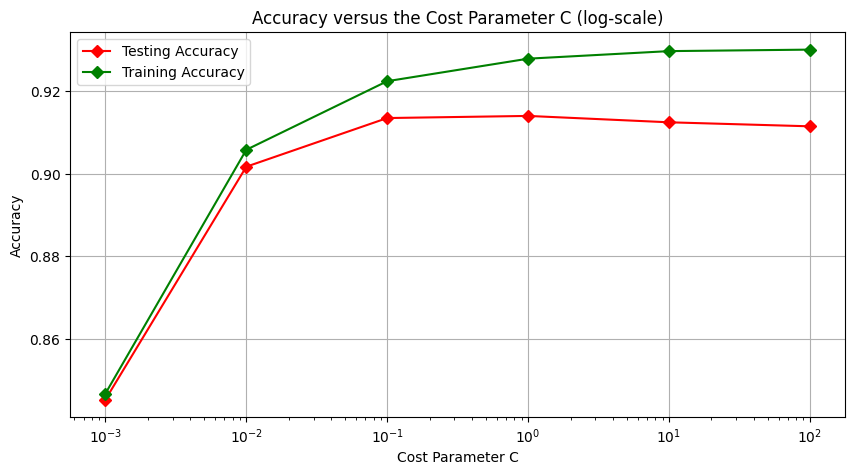

In [22]:
c = [0.001,0.01,0.1,1,10,100]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

Exact same thing with just a slight difference is clearly observed here as well. We see a bias variance trade off in the graph. As the cost increases, the Training accuracy increases, so as the test accuracy, but only till c=1, then we see overfitting. From, c=10 to 1000 we see the model overfitting and we see Low Bias and High Variance. Only thing is with L1 Penalty we have a lesser effect of overfitting and the model performs really poorly with lesser cost values.
Again, as we go from Left to Right: Bias Decreases and Variance Increases

**choose the model with best testing accuracy i.e. c = 1**

In [23]:
svm_coef = coefficient[4]
svm_coef.shape

(10, 784)

In [ ]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

**SVC RBF kernel**

In [24]:


from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

**We generate a random sample of the data and check how the distribution is compared to the original distribution**

We choose sampling as running these many models would increase the time complexity as well. SO keeping time constraint in mind I sample 10% of the data.

In [30]:
seq = np.random.randint(0,52500,5250)
train_samp_x = X_train[seq]
train_samp_y = y_train[seq]

train_samp_x.shape, train_samp_y.shape

((6000, 784), (6000,))

In [31]:
seq = np.random.randint(0,17500,1750)
test_samp_x = X_test[seq]
test_samp_y = y_test[seq]

test_samp_x.shape, test_samp_y.shape

((1000, 784), (1000,))

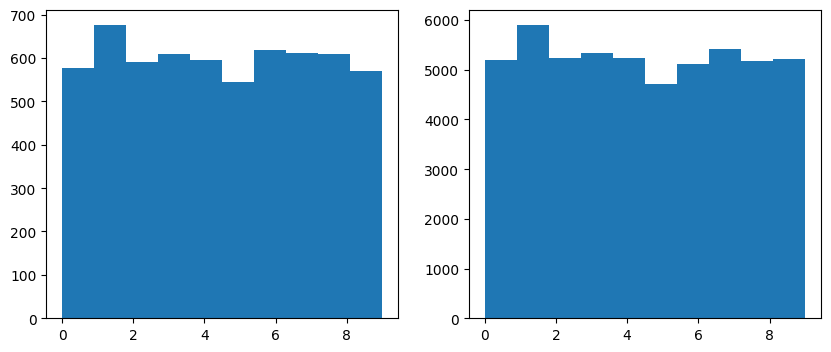

In [32]:
fig, ax = matplot.subplots(1,2, figsize=(10,4))
ax[0].hist(train_samp_y)
ax[1].hist(y_train)
fig.show
matplot.show()

**Running SVC for multiple cost factor(s) C and Gamma**

In [33]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10]:
    for g in [0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel='rbf', C=c, gamma=g)
        model = svm.fit(train_samp_x, train_samp_y)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(train_samp_x)
        a_tr = accuracy_score(train_samp_y, p_tr)

        pred = svm.predict(test_samp_x)
        a = accuracy_score(test_samp_y, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,g,a_tr,a]
        i=i+1

In [34]:
df

,c,gamma,train_acc,test_acc
0,0.01,0.01,0.674833,0.653
1,0.01,0.10,0.112667,0.112
2,0.01,1.00,0.112667,0.112
3,0.01,10.00,0.112667,0.112
4,0.10,0.01,0.920333,0.908
5,0.10,0.10,0.260000,0.243
6,0.10,1.00,0.112667,0.112
7,0.10,10.00,0.112667,0.112
8,1.00,0.01,0.977167,0.949
9,1.00,0.10,1.000000,0.842


**Question:**

Comment on the bias and variance of the SVC classifier with respect to C and gamma. Comment on the results overall in comparison to LinearSVC. What values would you choose?

**We choose C=10 and Gamma=0.01 to look at the Support vectors**

In [35]:
pd.DataFrame(coefficient[15]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,5663,5664,5665,5666,5667,5668,5669,5670,5671,5672
0,1.077148,1.078125,1.077148,1.077148,1.077148,1.077148,1.077148,1.077148,1.077148,1.077148,...,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977
1,1.020508,1.020508,1.020508,1.020508,1.020508,1.020508,1.020508,1.020508,1.020508,1.020508,...,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102,-1.079102
2,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,...,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461,-1.022461
3,1.022461,1.022461,1.022461,1.022461,1.022461,1.022461,1.022461,1.022461,1.022461,1.022461,...,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320
4,0.978516,0.978516,0.978516,0.978516,0.978516,0.978516,0.978516,0.978516,0.978516,0.978516,...,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414,-1.024414
5,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,...,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445
6,1.038086,1.038086,1.038086,1.038086,1.038086,1.038086,1.038086,1.038086,1.038086,1.038086,...,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320,-1.028320
7,1.032227,1.032227,1.032227,1.032227,1.032227,1.032227,1.032227,1.032227,1.032227,1.032227,...,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039,-1.040039
8,0.998047,0.998047,0.999023,0.999023,0.999023,0.999023,0.999023,0.999023,0.999023,0.999023,...,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180,-1.034180


**SVC Poly kernel**

In [36]:
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')



In [38]:
#generating a random sequence for sampling
seq = np.random.randint(0,52500,5250)
train_samp_x = X_train[seq]
train_samp_y = y_train[seq]

train_samp_x.shape, train_samp_y.shape

((5250, 784), (5250,))

In [40]:
seq = np.random.randint(0,17500,1750)
test_samp_x = X_test[seq]
test_samp_y = y_test[seq]

test_samp_x.shape, test_samp_y.shape

((1750, 784), (1750,))

In [46]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for d in [2,3,4,5]:
        svm = SVC(kernel='poly', C=c, degree=d)
        model = svm.fit(train_samp_x, train_samp_y)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(train_samp_x)
        a_tr = accuracy_score(train_samp_y, p_tr)

        pred = svm.predict(test_samp_x)
        a = accuracy_score(test_samp_y, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,d,a_tr,a]
        i=i+1

In [47]:
df

,c,degree,train_acc,test_acc
0,0.01,2.0,0.682667,0.680571
1,0.01,3.0,0.582476,0.584571
2,0.01,4.0,0.491429,0.474857
3,0.01,5.0,0.439429,0.415429
4,0.10,2.0,0.926286,0.896000
5,0.10,3.0,0.909714,0.866286
6,0.10,4.0,0.849333,0.802857
7,0.10,5.0,0.784381,0.737714
8,1.00,2.0,0.985143,0.934857
9,1.00,3.0,0.987048,0.925714


**Question:**

Comment on the bias and variance of the SVC classifier with respect to C and gamma. Comment on the results overall in comparison to LinearSVC. What values would you choose?

**We choose C=10 and Degree=2 to look at the Support vectors**

In [49]:
pd.DataFrame(coefficient[10]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092
0,1.0,0.019249,1.000000,0.000000,0.000000,0.157719,0.871158,0.235572,0.000000,0.645093,...,-0.000000,-0.035396,-0.108949,-0.244696,-0.000000,-0.169591,-0.335254,-1.0,-0.178938,-0.068013
1,1.0,0.122282,0.983177,0.017790,0.000000,0.927202,0.782431,0.537653,0.000000,0.888521,...,-0.972611,-1.000000,-1.000000,-0.000000,-0.000000,-1.000000,-1.000000,-1.0,-0.000000,-0.000000
2,1.0,0.147983,0.906324,0.074100,0.000000,0.461798,0.824120,0.755499,0.000000,0.820800,...,-0.000000,-0.869350,-1.000000,-0.001666,-0.000000,-0.465269,-1.000000,-1.0,-0.046687,-0.163816
3,1.0,0.028034,0.953098,0.000000,0.000000,0.406575,0.876876,0.497079,0.000000,0.742091,...,-0.921751,-1.000000,-1.000000,-0.000000,-0.000000,-0.632577,-1.000000,-1.0,-0.148069,-0.000000
4,1.0,0.159256,1.000000,0.189270,0.000000,0.673754,0.975035,0.557188,0.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-0.609379,-0.300359,-1.000000,-1.000000,-1.0,-0.000000,-0.076385
5,1.0,0.000000,1.000000,0.000000,0.000000,0.858235,0.851482,1.000000,0.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-0.000000,-0.000000,-1.000000,-1.000000,-1.0,-0.000000,-0.000000
6,1.0,0.163748,1.000000,0.000000,0.000000,0.420504,0.919868,0.379865,0.000000,0.627716,...,-0.041348,-0.741370,-1.000000,-0.000000,-0.000000,-0.577053,-1.000000,-1.0,-0.000000,-0.000000
7,1.0,0.069889,0.760664,0.015766,0.000000,0.398732,0.720072,0.047980,0.000000,0.920301,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.000000,-1.000000,-1.000000,-1.0,-0.013375,-0.000000
8,1.0,0.337607,1.000000,0.000000,0.050503,0.636953,0.836981,0.387955,0.091566,0.855148,...,-0.183288,-0.254967,-1.000000,-0.000000,-0.000000,-0.147289,-0.734992,-1.0,-0.135309,-0.178231


**To Summarize the Model Performance (test accuracy):**



*   Linear SVC (best performance): 92 %
*   SVC rbf (best performance): 96.4 %
*   SVC poly (best performance): 94.5 %
*   Logistic regression (previous notebook): 89 %


**It is clear that SVM with 'rbf' kernel gives the best result among all these models.**